# Project Description:Twitter US Airline Sentiment

## Objective:
To implement the techniques learnt as a part of the course.


## Data Description: 
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Data Dictionary:
he project is from a dataset from Kaggle.Link to the Kaggle project site:https://www.kaggle.com/crowdflower/twitter-airline-sentimentThe dataset has to be downloaded from the above Kagglewebsite.The dataset has the following columns:

* tweet_id
* airline_sentiment
* airline_sentiment_confidence
* negativereason
* negativereason_confidence
* airline
* airline_sentiment_gold
* name
* negativereason_gold
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location
* user_timezone

### Learning Outcomes

* Basic understanding of text pre-processing.
* What to do after text pre-processing:
* Bag of words
* Tf-idf
* Build the classification model.
* Evaluate the Model.

### Steps and Tasks

1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
2. Understand of data-columns: (5 Marks)
    a. Drop all other columns except “text” and “airline_sentiment”.
    b. Check the shape of data.
    c. Print first 5 rows of data.
3. Text pre-processing: Data preparation. (20 Marks)
    a. Html tag removal.
    b. Tokenization.
    c. Remove the numbers.
    d. Removal of Special Characters and Punctuations.
    e. Conversion to lowercase.
    f. Lemmatize or stemming.
    g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
    h. Print first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

## Lets import all the libraries

In [141]:
import warnings
warnings.filterwarnings('ignore')

import re, string, unicodedata                          # Import Regex, string and unicodedata.
#import contractions                                     # Import contractions library.
#i Was not able to install contractions so i just skipped this step
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import matplotlib
import matplotlib.pyplot as plt
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

#Lets Get all the sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [142]:
#Lets read the dataset
tweetsdata = pd.read_csv('Tweets.csv')

## Lets check the Dataset and look at its properties

In [143]:
#Lets check what the dataset is made up of
tweetsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

- There are total of 14 columns and total of 10000 entries.
- There seems to be a few categorical object columns and others a continuous variables
- The dependent variable in this case is Exited which tells us whether the customer left the bank or not

In [144]:
#Lets check the shape
tweetsdata.shape

(14640, 15)

Seems like there are around 14640 entries or tweets with 15 columns or parameters

In [145]:
# Since we are viewing texts lets set the right option
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

In [146]:
#Lets check the first 5 entries of the tweets dataset
tweetsdata.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [147]:
#Lets check for null values
tweetsdata.isnull().sum(axis=0) 

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

There are a lot of Null values but since we only care about "text" and "airline_sentiment" column which have no null values, we do not need to do anything

## Understanding the data Columns

In [148]:
#Lets drop all the columns we dont need and as requested by the dataset
tweetsdata.drop(columns=['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
         inplace=True)

In [149]:
#Lets check the shape of the dataset. now there should be only 2 columns
tweetsdata.shape

(14640, 2)

In [150]:
#Lets also check the first 5 records
tweetsdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [151]:
# lets turn the sentiment to negative: 0, neutral: 1, positive: 2
#I will also like to see if there is more negative or positive sentiment. Lets check
tweets = tweetsdata.copy()
tweets['airline_sentiment'] = tweetsdata['airline_sentiment'].astype('category').cat.codes
tweets['airline_sentiment'].value_counts(normalize=True,
                          dropna=False).sort_index()

0    0.626913
1    0.211680
2    0.161407
Name: airline_sentiment, dtype: float64

Its clear that there are more negative sentiments than there are positive sentiments

## Data Pre-Processing

a. Html tag removal.

b. Tokenization.

c. Remove the numbers.

d. Removal of Special Characters and Punctuations.

e. Conversion to lowercase.

f. Lemmatize or stemming.

g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)

h. Print first 5 rows of data after pre-processing.

In [153]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

tweetsdata['text'] = tweetsdata['text'].apply(lambda x: strip_html(x))
tweetsdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [154]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

tweetsdata['text'] = tweetsdata['text'].apply(lambda x: remove_numbers(x))
tweetsdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [155]:
tweetsdata['text'] = tweetsdata.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [156]:
tweetsdata.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, 's, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big, bad, thing, about, it]"


In [157]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))      

In [158]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

tweetsdata['text'] = tweetsdata.apply(lambda row: normalize(row['text']), axis=1)
tweetsdata.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica nt today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


Looks like we have been able to succesfully do the preprocessing and we can move to the next step of vectorization before modelling

## Lets do vectorization

In [159]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(tweetsdata['text'])

data_features_count_vec = data_features.toarray()                        # Convert the data features to array.
data_features_count_vec.shape

(14640, 1000)

In [160]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(tweetsdata['text'])

data_features_tfid_vec = data_features.toarray()                        # Convert the data features to array.

data_features_tfid_vec.shape

(14640, 1000)

## Modelling

Lets do the model with count vectorization first

In [179]:
#Lets set the labels (y) as the airline_sentiment column
labels = tweetsdata['airline_sentiment']

In [180]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(data_features_count_vec, labels, test_size=0.3, random_state=42)

In [181]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features_count_vec, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7101775956284152


Seems like we get a 71% accuracy with a random forest. Lets see if we can get something better with Logistic regression

In [182]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)   
logreg.score(X_test, y_test)

0.788023679417122

Seems like we improved the accuracy. Lets see the confusion/correlation matrix

In [183]:
result = logreg.predict(X_test)

[[2479  250   85]
 [ 298  512   74]
 [ 120  104  470]]


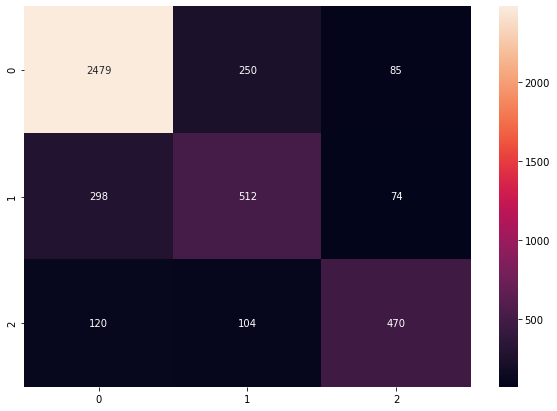

In [184]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Now lets try with TD-idf Vectorization

In [185]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(data_features_tfid_vec, labels, test_size=0.3, random_state=42)

In [187]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features_tfid_vec, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7107240437158471


Seems very similar to what we got with count vectorization

In [188]:
result = forest.predict(X_test)

[[2601  163   50]
 [ 432  388   64]
 [ 221   97  376]]


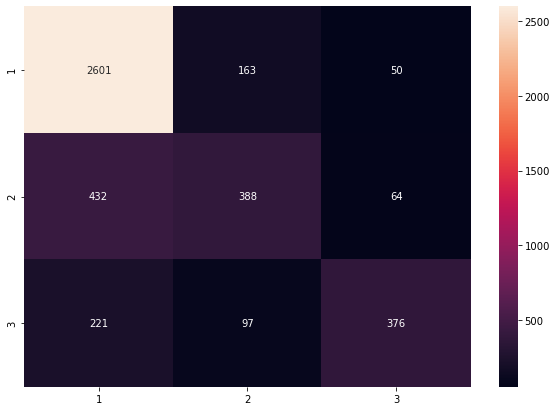

In [189]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Like in the case of count vectorization, lets try logistic regression to see if we can do better

In [190]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)   
logreg.score(X_test, y_test)

0.7971311475409836

In [191]:
result = logreg.predict(X_test)

[[2610  155   49]
 [ 370  458   56]
 [ 160  101  433]]


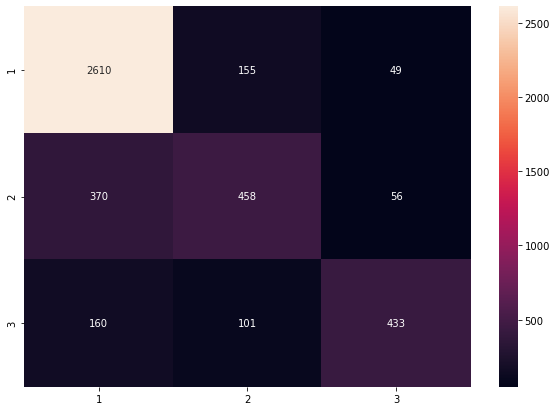

In [192]:
conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## Summary of Understanding

I applied several pre-processing steps to get the data ready for modelling. This included HTML token removal, tokenization, removal of numbers, removal of special characters, conversion to lowercase, lemmatizations and pruning of multiple inflections. 

Following the data preprocessing, I was able to use two variants of vectorization Count Vectorizer and TD-IDF Vectorizer. Once this step was done, i was able to run two different algorithm on the two vectorized datasets- random forest and logistic regression. Clearly the best option was the TD-IDF vectorization and Logistic regression classification, which gave us around 79% accuracy. this model can be employed in the future to indicate of the tweets are neutral, negative, or positive. this will give the airline to review the tweets with the right context and make the improvements in their service as needed.